In [1]:
# Author : Gaurab Dutta
# Email : gaurabdutta8@gmail.com
# Project : Customer Churn Prediction

## Importing Libraries

In [30]:
# Load jupyter browser notification extension
%load_ext jupyternotify
# %reload_ext jupyternotify
# %%notify

<IPython.core.display.Javascript object>

In [1]:
# Importing basic labraries
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# sklearn modules
from sklearn.utils import resample
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, plot_confusion_matrix, f1_score, average_precision_score
from sklearn.metrics import classification_report, recall_score, precision_score, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.calibration import calibration_curve

In [4]:
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [5]:
# Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
# Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Importing DataSet

In [8]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 102C-9CE7

 Directory of C:\Users\Gaurab\Workspace\Capstone_Project\Customer_Churn

17-03-2021  16:54    <DIR>          .
17-03-2021  16:54    <DIR>          ..
17-03-2021  09:08    <DIR>          .ipynb_checkpoints
17-03-2021  16:54         1,337,396 Customer_Churn.ipynb
10-02-2021  16:25               216 sample_submission.csv
10-02-2021  16:23         4,649,219 test.csv
10-02-2021  16:16         8,705,698 train.csv
               4 File(s)     14,692,529 bytes
               3 Dir(s)  157,241,815,040 bytes free


In [7]:
train_data = pd.read_csv('train.csv')
train_data.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [8]:
test_data = pd.read_csv('test.csv')
test_data.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,Without Offers,Smartphone,Wi-Fi,07:19:30,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,Without Offers,Desktop,Fiber_Optic,22:21:16,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,Gift Vouchers/Coupons,Both,Mobile_Data,16:40:39,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,Credit/Debit Card Offers,?,Fiber_Optic,14:56:17,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,Without Offers,Smartphone,Mobile_Data,02:57:53,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


## Understanding the data

In [11]:
train_data.shape
test_data.shape

(36992, 25)

(19919, 24)

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [13]:
train_data.nunique()

customer_id                     36992
Name                            36992
age                                55
gender                              3
security_no                     36992
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             3
referral_id                     11359
preferred_offer_types               3
medium_of_operation                 4
internet_option                     3
last_visit_time                 30101
days_since_last_login              27
avg_time_spent                  25961
avg_transaction_value           36894
avg_frequency_login_days         1654
points_in_wallet                23699
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    6
dtype: int64

In [14]:
train_data.describe()
train_data.describe(include=['O'])

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


,customer_id,Name,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,avg_frequency_login_days,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,36992,36992,36992,36992,31564,36992,36992,36992,36992,36704,36992,36992,36992,36992,36992,36992,36992,36992,36992
unique,36992,36992,3,36992,3,6,1096,3,11359,3,4,3,30101,1654,2,2,2,5,9
top,fffe43004900440035003200300034003900,Harriette Primeaux,F,SGENLCX,Town,Basic Membership,2015-06-02,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,07:56:41,Error,Yes,Yes,No,Not Applicable,Poor Product Quality
freq,1,1,18490,1,14128,7724,55,15839,17846,12349,13913,12413,6,3522,20342,20440,18602,18602,6350


In [15]:
train_data['churn_risk_score'].unique()

array([ 2,  1,  5,  3,  4, -1], dtype=int64)

## Handling Null values & cleaning the data

In [9]:
# Dropping the unimportant columns
df_train = train_data.drop(columns=['customer_id', 'Name', 'security_no', 'referral_id'], axis=1)
df_test = test_data.drop(columns=['customer_id', 'Name', 'security_no', 'referral_id'], axis=1)

In [17]:
df_train.shape
df_test.shape

(36992, 21)

(19919, 20)

In [18]:
df_train.tail()
df_test.tail()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
36987,46,F,NaN,Basic Membership,2017-09-21,No,Credit/Debit Card Offers,Desktop,Wi-Fi,04:14:05,2,-650.682759,27277.68,6.0,639.510000,No,Yes,Yes,No Information Available,No reason specified,4
36988,29,F,Town,Basic Membership,2016-06-27,No,Without Offers,Smartphone,Wi-Fi,23:18:31,13,-638.123421,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,5
36989,23,F,NaN,Basic Membership,2016-09-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,03:50:25,12,154.940000,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,4
36990,53,M,Village,Platinum Membership,2017-06-15,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,09:50:03,15,482.610000,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,3
36991,35,M,Town,Silver Membership,2015-10-23,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,01:39:52,15,79.180000,2189.68,Error,719.970000,Yes,No,No,Not Applicable,Quality Customer Care,2


,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
19914,12,M,NaN,Gold Membership,2015-01-25,No,Without Offers,Desktop,Fiber_Optic,00:32:43,16,103.57,46279.35,18.0,708.120000,No,Yes,No,Not Applicable,Poor Product Quality
19915,40,F,Village,No Membership,2017-12-31,Yes,Without Offers,Desktop,Fiber_Optic,07:54:37,21,63.19,23466.26,Error,574.340000,No,Yes,No,Not Applicable,No reason specified
19916,55,M,Town,No Membership,2015-09-09,No,Credit/Debit Card Offers,Desktop,Mobile_Data,09:26:37,18,68.72,17903.75,24.0,564.300000,No,Yes,Yes,Unsolved,No reason specified
19917,17,F,City,Silver Membership,2016-04-17,Yes,Credit/Debit Card Offers,Smartphone,Fiber_Optic,21:59:14,3,119.54,14057.09,22.0,606.340000,No,Yes,No,Not Applicable,Poor Website
19918,20,M,Town,Premium Membership,2017-10-30,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,10:50:15,8,505.26,36786.44,Error,1193.689813,No,Yes,Yes,Unsolved,Too many ads


In [19]:
df_train.columns[df_train.dtypes == object]

Index(['gender', 'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'avg_frequency_login_days', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback'],
      dtype='object')

In [20]:
df_train['avg_frequency_login_days'].values

array(['17.0', '10.0', '22.0', ..., 'Error', '20.0', 'Error'],
      dtype=object)

In [21]:
df_train[pd.to_numeric(df_train.avg_frequency_login_days, errors='coerce').isnull()]

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
39,49,F,Village,Platinum Membership,2017-06-09,Yes,Credit/Debit Card Offers,Both,Fiber_Optic,23:11:17,8,706.36,19062.25,Error,780.580000,Yes,No,No,Not Applicable,Poor Product Quality,3
44,36,M,Village,Silver Membership,2016-11-28,Yes,Gift Vouchers/Coupons,?,Mobile_Data,06:06:05,2,691.09,17989.46,Error,NaN,No,Yes,Yes,Solved,No reason specified,4
45,12,M,City,Premium Membership,2017-02-13,No,Without Offers,Desktop,Mobile_Data,22:27:40,8,33.09,55607.35,Error,NaN,Yes,No,No,Not Applicable,User Friendly Website,1
48,30,M,City,Platinum Membership,2015-12-11,?,Gift Vouchers/Coupons,Smartphone,Wi-Fi,14:13:01,20,100.42,86433.91,Error,719.930000,No,Yes,Yes,Unsolved,Reasonable Price,2
50,23,M,Village,Gold Membership,2015-10-22,Yes,Without Offers,?,Wi-Fi,14:01:02,10,65.25,5136.08,Error,755.220000,No,Yes,No,Not Applicable,Poor Customer Service,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36960,40,F,Town,Basic Membership,2017-11-20,No,Without Offers,?,Wi-Fi,02:35:26,25,96.33,16361.98,Error,954.137008,No,Yes,No,Not Applicable,Too many ads,4
36962,26,M,City,Gold Membership,2017-02-08,No,Without Offers,?,Wi-Fi,21:34:15,19,202.95,10356.88,Error,693.380000,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,4
36971,42,F,Town,Premium Membership,2015-02-04,?,Credit/Debit Card Offers,Desktop,Fiber_Optic,13:08:11,16,34.10,39439.10,Error,1224.393346,Yes,No,Yes,Solved in Follow-up,Too many ads,3
36989,23,F,NaN,Basic Membership,2016-09-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,03:50:25,12,154.94,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,4


In [10]:
df_train['avg_frequency_login_days'] = pd.to_numeric(df_train['avg_frequency_login_days'], errors='coerce')
df_test['avg_frequency_login_days'] = pd.to_numeric(df_test['avg_frequency_login_days'], errors='coerce')

In [23]:
df_train.isnull().sum()

age                                0
gender                             0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days        3522
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [24]:
df_test.isnull().sum()

age                                0
gender                             0
region_category                 2948
membership_category                0
joining_date                       0
joined_through_referral            0
preferred_offer_types            159
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days        1915
points_in_wallet                1963
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [25]:
df_train[df_train.columns[df_train.isnull().sum()!=0]].isnull().sum().count()

4

<AxesSubplot:>

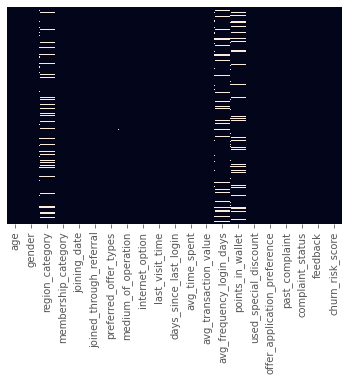

In [26]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False)

In [27]:
df_train['region_category'].unique()
df_train['preferred_offer_types'].unique()
df_train['avg_frequency_login_days'].unique()
df_train['points_in_wallet'].unique()

array(['Village', 'City', 'Town', nan], dtype=object)

array(['Gift Vouchers/Coupons', 'Credit/Debit Card Offers',
       'Without Offers', nan], dtype=object)

array([17.        , 10.        , 22.        , ..., -9.32551114,
       -8.75932971, 27.83992744])

array([781.75      ,          nan, 500.69      , ..., 242.97962545,
       639.51      , 197.26441364])

In [28]:
df_train['region_category'].dtype
df_train['preferred_offer_types'].dtype
df_train['avg_frequency_login_days'].dtype
df_train['points_in_wallet'].dtype

dtype('O')

dtype('O')

dtype('float64')

dtype('float64')

<AxesSubplot:xlabel='points_in_wallet', ylabel='Density'>

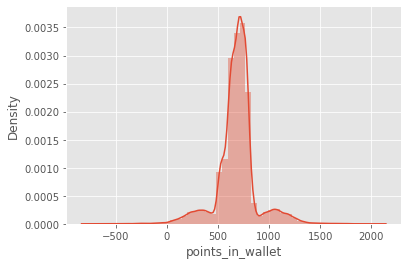

In [29]:
sns.distplot(df_train['points_in_wallet'])

<AxesSubplot:xlabel='avg_frequency_login_days', ylabel='Density'>

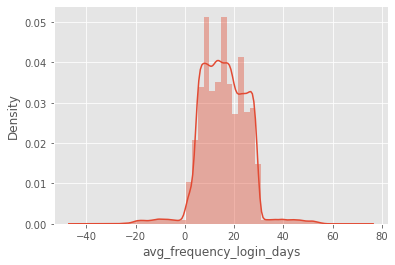

In [30]:
sns.distplot(df_train['avg_frequency_login_days'])

In [31]:
print('Mean: ', df_train['points_in_wallet'].mean())
print('Median: ', df_train['points_in_wallet'].median())

Mean:  686.882198742908
Median:  697.62


In [32]:
print('Mean: ', df_train['avg_frequency_login_days'].mean())
print('Median: ', df_train['avg_frequency_login_days'].median())

Mean:  15.97671523740627
Median:  16.0


In [33]:
df_train['region_category'].mode()[0]
df_train['preferred_offer_types'].mode()[0]

'Town'

'Gift Vouchers/Coupons'

In [11]:
df_train['region_category'] = df_train['region_category'].fillna('Unknown')
df_train['preferred_offer_types'] = df_train['preferred_offer_types'].fillna(df_train['preferred_offer_types'].mode()[0])
df_train['points_in_wallet'] = df_train['points_in_wallet'].fillna(df_train['points_in_wallet'].median())
df_train['avg_frequency_login_days'] = df_train['avg_frequency_login_days'].fillna(df_train['avg_frequency_login_days'].median())

In [12]:
df_test['region_category'] = df_test['region_category'].fillna('Unknown')
df_test['preferred_offer_types'] = df_test['preferred_offer_types'].fillna(df_test['preferred_offer_types'].mode()[0])
df_test['points_in_wallet'] = df_test['points_in_wallet'].fillna(df_test['points_in_wallet'].median())
df_test['avg_frequency_login_days'] = df_test['avg_frequency_login_days'].fillna(df_test['avg_frequency_login_days'].median())

<AxesSubplot:>

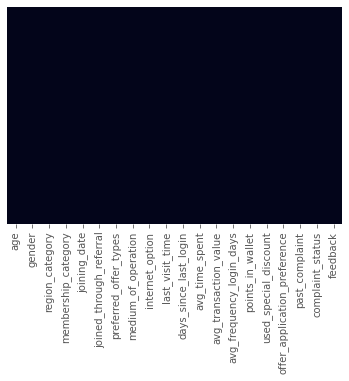

In [36]:
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False)

In [12]:
df_train['joining_date'] = pd.to_datetime(df_train['joining_date'], format = '%Y-%m-%d')
df_train['last_visit_time'] = pd.to_datetime(df_train['last_visit_time'], format = '%H:%M:%S').dt.time

<AxesSubplot:xlabel='joining_date', ylabel='Count'>

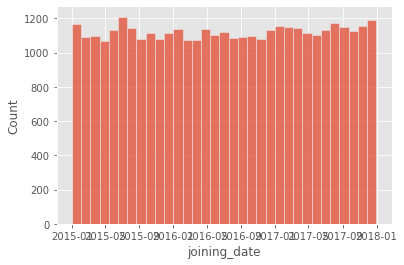

In [38]:
sns.histplot(df_train['joining_date'])

In [39]:
df_train['joining_date'].min()
df_train['joining_date'].max()

Timestamp('2015-01-01 00:00:00')

Timestamp('2017-12-31 00:00:00')

In [40]:
df_train['last_visit_time'].min()
df_train['last_visit_time'].max()

datetime.time(0, 0)

datetime.time(23, 59, 59)

In [41]:
df_train['last_visit_time'].value_counts()

07:56:41    6
21:12:56    5
17:11:53    5
12:30:02    5
02:50:54    5
           ..
16:17:52    1
03:11:52    1
13:30:05    1
04:41:48    1
20:55:10    1
Name: last_visit_time, Length: 30101, dtype: int64

In [13]:
# Drop the date and time column
df_train = df_train.drop(columns=['joining_date', 'last_visit_time'], axis=1)
df_test = df_test.drop(columns=['joining_date', 'last_visit_time'], axis=1)

## Checking for duplicates

In [45]:
df_train[df_train.duplicated()]

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score


In [46]:
df_train.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

## Exploratory Data Analysis

In [14]:
df_eda = df_train.copy()

 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: churn_risk_score, dtype: int64


<AxesSubplot:xlabel='churn_risk_score', ylabel='count'>

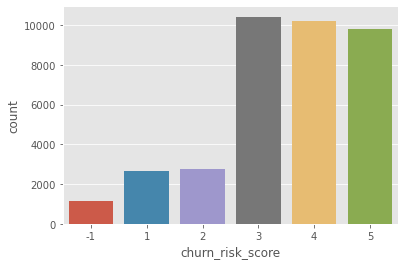

In [15]:
print(df_eda.churn_risk_score.value_counts())
sns.countplot(x="churn_risk_score", data=df_eda)

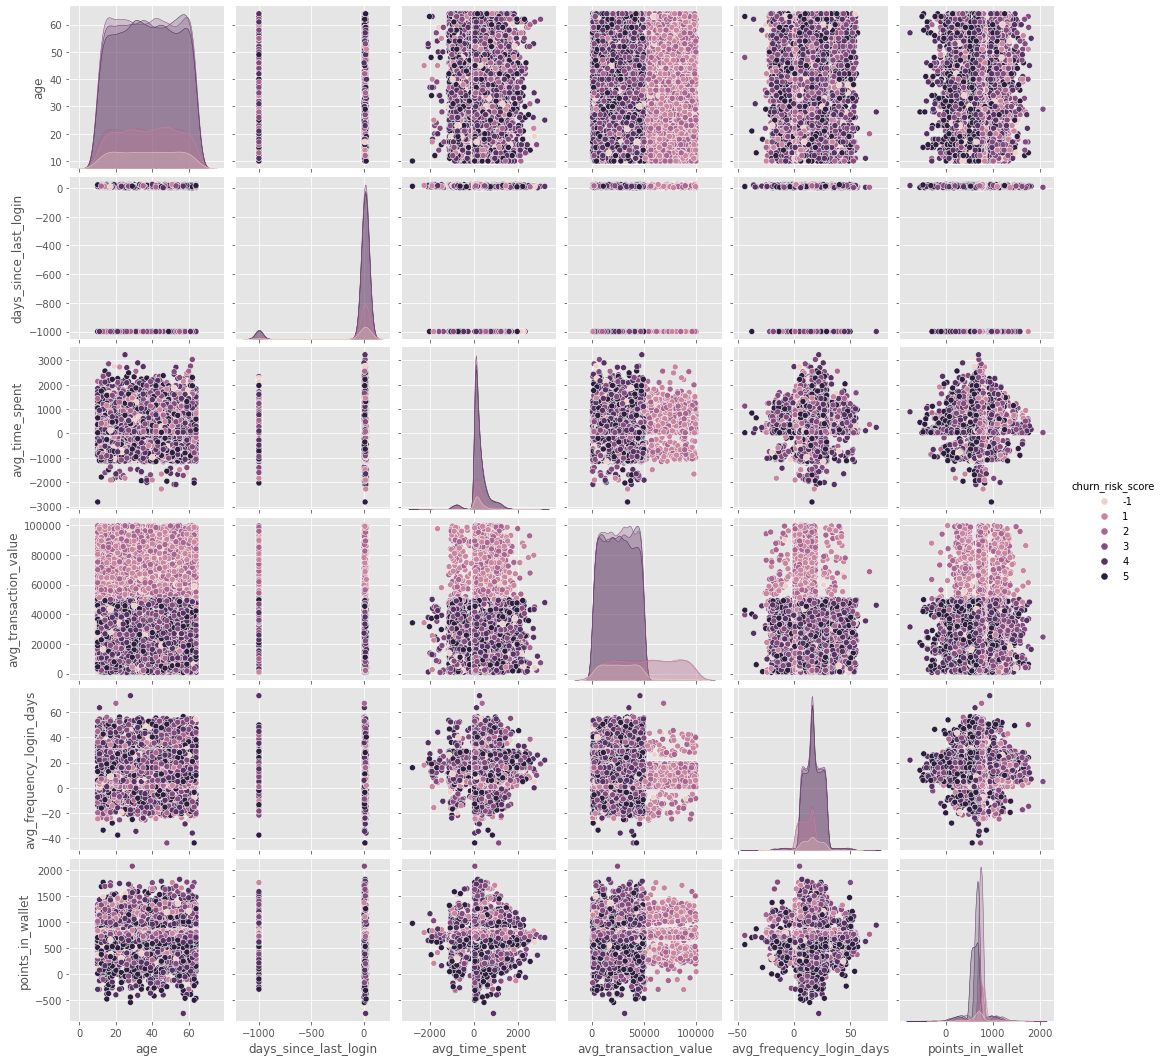

<IPython.core.display.Javascript object>

In [48]:
%%notify
sns.pairplot(df_eda, hue='churn_risk_score')

In [16]:
# Correlation
corr = df_eda.corr()
corr

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
age,1.000000,-0.003970,0.001531,-0.000473,-0.002051,0.000226,0.002360
days_since_last_login,-0.003970,1.000000,-0.002369,0.003934,0.000695,0.008735,-0.009918
avg_time_spent,0.001531,-0.002369,1.000000,0.020888,0.001722,-0.000584,-0.021052
avg_transaction_value,-0.000473,0.003934,0.020888,1.000000,-0.125530,0.083739,-0.288636
avg_frequency_login_days,-0.002051,0.000695,0.001722,-0.125530,1.000000,-0.043314,0.157056
points_in_wallet,0.000226,0.008735,-0.000584,0.083739,-0.043314,1.000000,-0.251969
churn_risk_score,0.002360,-0.009918,-0.021052,-0.288636,0.157056,-0.251969,1.000000


<Figure size 576x576 with 0 Axes>

<AxesSubplot:>

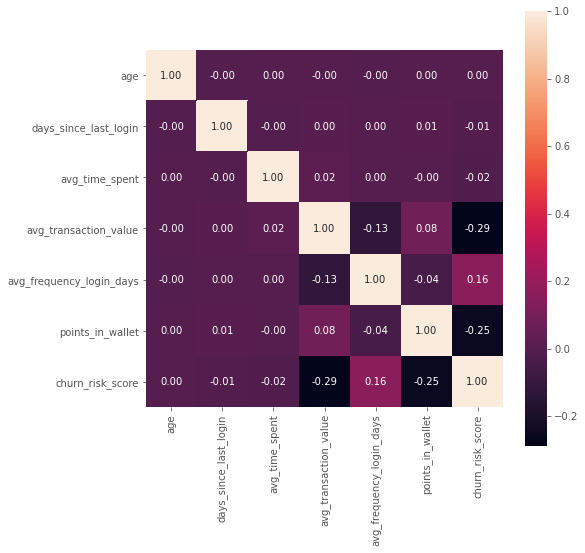

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, xticklabels=df_eda.corr().columns, yticklabels=df_eda.corr().columns, square=True, annot=True, fmt='0.2f')

## Handling Categorical Variables

In [52]:
for i in df_train.columns:
    if df_train[i].dtype == 'object':
        print(i,':', df_train[i].unique(), '\n')

gender : ['F' 'M' 'Unknown'] 

region_category : ['Village' 'City' 'Town' 'Unknown'] 

membership_category : ['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership'] 

joined_through_referral : ['No' '?' 'Yes'] 

preferred_offer_types : ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers'] 

medium_of_operation : ['?' 'Desktop' 'Smartphone' 'Both'] 

internet_option : ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic'] 

used_special_discount : ['Yes' 'No'] 

offer_application_preference : ['Yes' 'No'] 

past_complaint : ['No' 'Yes'] 

complaint_status : ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Available'] 

feedback : ['Products always in Stock' 'Quality Customer Care' 'Poor Website'
 'No reason specified' 'Poor Product Quality' 'Poor Customer Service'
 'Too many ads' 'User Friendly Website' 'Reasonable Price'] 



In [53]:
df_train.gender.value_counts()
df_train.joined_through_referral.value_counts()

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64

No     15839
Yes    15715
?       5438
Name: joined_through_referral, dtype: int64

In [19]:
for i in df_train.columns:
    if df_train[i].dtype == 'object' and len(df_train[i].unique()) == 2:
        print(i,':', df_train[i].unique(), '\n')
        df_train[i].replace({'Yes': 1,'No': 0}, inplace=True)

used_special_discount : ['Yes' 'No'] 

offer_application_preference : ['Yes' 'No'] 

past_complaint : ['No' 'Yes'] 



In [20]:
for i in df_test.columns:
    if df_test[i].dtype == 'object' and len(df_test[i].unique()) == 2:
        print(i,':', df_test[i].unique(), '\n')
        df_test[i].replace({'Yes': 1,'No': 0}, inplace=True)

used_special_discount : ['Yes' 'No'] 

offer_application_preference : ['No' 'Yes'] 

past_complaint : ['No' 'Yes'] 



In [18]:
df_test.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,50,F,Village,Premium Membership,No,Without Offers,Smartphone,Wi-Fi,12,386.26,40721.44,7.0,733.830000,1,0,0,Not Applicable,Poor Product Quality
1,41,M,Village,Gold Membership,No,Without Offers,Desktop,Fiber_Optic,11,37.80,9644.40,9.0,726.000000,1,0,0,Not Applicable,Poor Website
2,31,F,Town,Silver Membership,No,Gift Vouchers/Coupons,Both,Mobile_Data,18,215.36,3693.25,21.0,713.780000,1,0,1,Solved in Follow-up,No reason specified
3,64,M,Town,Silver Membership,Yes,Credit/Debit Card Offers,?,Fiber_Optic,-999,44.57,36809.56,11.0,744.970000,1,0,1,No Information Available,Too many ads
4,16,F,Town,No Membership,Yes,Without Offers,Smartphone,Mobile_Data,6,349.88,40675.86,8.0,299.048351,0,1,1,Solved in Follow-up,Poor Website


In [37]:
# df_train = df_train[df_train['gender'] != 'Unknown']
# df_train.shape

In [83]:
# le = LabelEncoder()
# df_train['gender'] = le.fit_transform(df_train['gender'])
# df_test['gender'] = le.fit_transform(df_test['gender'])

In [ ]:
# df = df_train.copy()

# village = df.region_category[df['region_category'] == 'Village'].count()
# town = df.region_category[df['region_category'] == 'Town'].count()
# city = df.region_category[df['region_category'] == 'City'].count()
# unknown = df.region_category[df['region_category'] == 'Unknown'].count()

# village1 = round(unknown*(village/(village+town+city)))
# town1 = round(unknown*(town/(village+town+city)))
# city1 = round(unknown*(city/(village+town+city)))
# unknown1 = village1+town1+city1

# print('village1:', village1)
# print('town1:', town1)
# print('city1:', city1)
# print('unknown1:', unknown1)

In [72]:
df_train.shape

(36992, 19)

In [23]:
columns = [i for i in df_train.columns if df_train[i].dtype=='object' and len(df_train[i].unique())>2]
columns

['gender',
 'region_category',
 'membership_category',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'complaint_status',
 'feedback']

In [21]:
def one_hot_encoder(df, columns):
    encoded_df = df.copy()

    for i in columns:
        dummies = pd.get_dummies(encoded_df[i], prefix=i)
        encoded_df = pd.concat([encoded_df, dummies], axis=1)
        encoded_df = encoded_df.drop(columns = [i], axis=1)
    
    return encoded_df

In [24]:
df_train = one_hot_encoder(df_train, columns)
df_test = one_hot_encoder(df_test, columns)

In [25]:
df_train.columns[df_train.dtypes == 'object']
df_test.columns[df_test.dtypes == 'object']

Index([], dtype='object')

Index([], dtype='object')

In [36]:
df_train.columns

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'churn_risk_score', 'gender_F', 'gender_M',
       'gender_Unknown', 'region_category_City', 'region_category_Town',
       'region_category_Unknown', 'region_category_Village',
       'membership_category_Basic Membership',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_?',
       'joined_through_referral_No', 'joined_through_referral_Yes',
       'preferred_offer_types_Credit/Debit Card Offers',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_?',
       'medium_of_operation_Both

In [26]:
del_col = ['gender_Unknown',
           'region_category_Unknown',
           'membership_category_No Membership',
           'joined_through_referral_?',
           'preferred_offer_types_Without Offers',
           'medium_of_operation_?',
           'complaint_status_No Information Available',
           'feedback_No reason specified']

df_train = df_train.drop(columns = del_col, axis = 1)
df_test = df_test.drop(columns = del_col, axis = 1)

In [39]:
df_train.shape
df_test.shape

(36992, 42)

(19919, 41)

In [48]:
df_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,churn_risk_score,...,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,17,300.63,53005.25,17.0,781.75,1,1,0,2,...,0,0,0,0,0,1,0,0,0,0
1,32,16,306.34,12838.38,10.0,697.62,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
2,44,14,516.16,21027.00,22.0,500.69,0,1,1,5,...,1,0,0,0,1,0,0,0,0,0
3,37,11,53.27,25239.56,6.0,567.66,0,1,1,5,...,0,1,0,0,1,0,0,0,0,0
4,31,20,113.13,24483.66,16.0,663.06,0,1,1,5,...,0,0,0,0,1,0,0,0,0,0


In [42]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,36992.0,37.118161,15.867412,10.000000,23.0000,37.000,51.0000,64.000000
days_since_last_login,36992.0,-41.915576,228.819900,-999.000000,8.0000,12.000,16.0000,26.000000
avg_time_spent,36992.0,243.472334,398.289149,-2814.109110,60.1025,161.765,356.5150,3235.578521
avg_transaction_value,36992.0,29271.194003,19444.806226,800.460000,14177.5400,27554.485,40855.1100,99914.050000
avg_frequency_login_days,36992.0,15.978932,8.766156,-43.652702,10.0000,16.000,22.0000,73.061995
points_in_wallet,36992.0,687.881611,184.838012,-760.661236,624.3500,697.620,757.0025,2069.069761
used_special_discount,36992.0,0.549903,0.497510,0.000000,0.0000,1.000,1.0000,1.000000
offer_application_preference,36992.0,0.552552,0.497237,0.000000,0.0000,1.000,1.0000,1.000000
past_complaint,36992.0,0.497135,0.499999,0.000000,0.0000,0.000,1.0000,1.000000
churn_risk_score,36992.0,3.463397,1.409661,-1.000000,3.0000,4.000,5.0000,5.000000


## Zero Variance Check

In [43]:
var_thres = VarianceThreshold(threshold=0.0)
var_thres.fit(df_train)

VarianceThreshold()

In [44]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [46]:
df_train.columns[var_thres.get_support() == False]

Index([], dtype='object')

## Train-Test Split

In [27]:
x = df_train.drop(columns=['churn_risk_score'], axis=1)
y = df_train['churn_risk_score']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Finding the best model using Auto-ML

In [29]:
from lazypredict.Supervised import LazyRegressor

In [31]:
%%notify
lreg = LazyRegressor()
models, predictions = lreg.fit(x_train, x_test, y_train, y_test)
models

100%|███████████████████████████████████████████████████████████████████████████████| 43/43 [3:16:11<00:00, 273.76s/it]


,R-Squared,RMSE,Time Taken
Model,,,
LGBMRegressor,0.45,1.04,0.51
HistGradientBoostingRegressor,0.45,1.04,2.26
GradientBoostingRegressor,0.45,1.04,5.82
XGBRegressor,0.44,1.06,3.11
RandomForestRegressor,0.42,1.07,18.88
ExtraTreesRegressor,0.41,1.08,11.99
MLPRegressor,0.39,1.10,46.85
BaggingRegressor,0.36,1.13,2.21
NuSVR,0.29,1.18,59.47


<IPython.core.display.Javascript object>

## Model Building And Performance Evaluation

In [51]:
# Decision Tree Model
model_dt = DecisionTreeClassifier()
model_dt.fit(x, y)

DecisionTreeClassifier()

In [76]:
# Random Forest Model
model_rf = RandomForestClassifier()
model_rf.fit(x, y)

RandomForestClassifier()

## Hyper-Parameter Optimization using GridSearchCV

In [ ]:
%%notify
np.random.seed(42)
start = time.time()

param_dist = {'n_estimators': [20, 50, 80, 100, 150, 200],
              'max_depth': [6, 8, 10, 20, 50, 80, 100],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(model_rf, cv = 10,
                     param_grid = param_dist,
                     n_jobs = -1)

cv_rf.fit(x, y)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

In [82]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [87]:
cv_rf.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'n_estimators': 80}

In [86]:
cv_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=None,
                       n_estimators=80)

In [77]:
# Set best parameters given by grid search 
model_rf.set_params(bootstrap = True, 
                    criterion = 'entropy', 
                    max_depth = 10, 
                    max_features = None,
                    n_estimators = 80)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=None,
                       n_estimators=80)

In [78]:
# Retrain the model
model_rf.fit(x, y)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=None,
                       n_estimators=80)

In [75]:
# XG Boost Model
model_xgb = XGBClassifier()
model_xgb.fit(x, y)

[12:58:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Standardization

In [22]:
scaler = StandardScaler()

In [25]:
x_scaled = scaler.fit_transform(x)

In [28]:
scaled_df = pd.DataFrame(x_scaled, columns = x.columns)
scaled_df.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,gender_F,gender_M,region_category_City,region_category_Town,region_category_Village,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_No,joined_through_referral_Yes,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,-1.204886,0.257479,0.143510,1.220602,0.116480,0.507848,0.904712,0.899880,-0.994285,1.000324,-0.997139,-0.724658,-0.786075,2.62151,-0.513718,-0.474365,2.743617,-0.370028,-0.439473,1.155639,-0.859413,-0.704671,1.388264,-0.338853,-0.776429,-0.774775,-0.703039,-0.707637,1.407161,0.994285,-0.377731,-0.375766,-0.378898,-0.45098,-0.455227,-0.451805,5.076121,-0.195366,-0.199578,-0.452152,-0.197666
1,-0.322562,0.253109,0.157846,-0.845112,-0.682056,0.052687,0.904712,-1.111259,1.005747,1.000324,-0.997139,1.379962,-0.786075,-0.38146,-0.513718,-0.474365,-0.364482,2.702495,-0.439473,-0.865322,-0.859413,-0.704671,1.388264,-0.338853,1.287947,-0.774775,-0.703039,1.413153,-0.710651,-1.005747,2.647387,-0.375766,-0.378898,-0.45098,-0.455227,-0.451805,-0.197001,5.118594,-0.199578,-0.452152,-0.197666
2,0.433715,0.244368,0.684657,-0.423985,0.686863,-1.012747,-1.105324,0.899880,1.005747,1.000324,-0.997139,-0.724658,1.272143,-0.38146,-0.513718,-0.474365,-0.364482,-0.370028,-0.439473,-0.865322,1.163585,-0.704671,1.388264,-0.338853,1.287947,-0.774775,-0.703039,-0.707637,1.407161,-1.005747,-0.377731,2.661231,-0.378898,-0.45098,-0.455227,2.213346,-0.197001,-0.195366,-0.199578,-0.452152,-0.197666
3,-0.007447,0.231257,-0.477555,-0.207340,-1.138363,-0.650425,-1.105324,0.899880,1.005747,-0.999676,1.002870,1.379962,-0.786075,-0.38146,-0.513718,-0.474365,-0.364482,-0.370028,-0.439473,-0.865322,1.163585,-0.704671,1.388264,-0.338853,1.287947,-0.774775,-0.703039,1.413153,-0.710651,-1.005747,-0.377731,-0.375766,2.639232,-0.45098,-0.455227,2.213346,-0.197001,-0.195366,-0.199578,-0.452152,-0.197666
4,-0.385585,0.270590,-0.327260,-0.246215,0.002403,-0.134290,-1.105324,0.899880,1.005747,1.000324,-0.997139,1.379962,-0.786075,-0.38146,-0.513718,-0.474365,-0.364482,-0.370028,-0.439473,1.155639,-0.859413,1.419102,-0.720324,-0.338853,-0.776429,1.290697,-0.703039,1.413153,-0.710651,-1.005747,2.647387,-0.375766,-0.378898,-0.45098,-0.455227,2.213346,-0.197001,-0.195366,-0.199578,-0.452152,-0.197666


In [29]:
abs(scaled_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
age,36992.0,4.439677e-17,1.000014,1.709071,0.889770,0.007447,0.874877,1.694177
days_since_last_login,36992.0,1.996553e-16,1.000014,4.182754,0.218146,0.235628,0.253109,0.296812
avg_time_spent,36992.0,3.403419e-17,1.000014,7.676892,0.460400,0.205149,0.283824,7.512498
avg_transaction_value,36992.0,7.575159e-18,1.000014,1.464202,0.776241,0.088287,0.595741,3.633043
avg_frequency_login_days,36992.0,2.424637e-16,1.000014,6.802575,0.682056,0.002403,0.686863,6.511843
points_in_wallet,36992.0,4.152022e-16,1.000014,7.836929,0.343720,0.052687,0.373959,7.472526
used_special_discount,36992.0,2.011577e-15,1.000014,1.105324,1.105324,0.904712,0.904712,0.904712
offer_application_preference,36992.0,1.003511e-15,1.000014,1.111259,1.111259,0.899880,0.899880,0.899880
past_complaint,36992.0,8.464190e-16,1.000014,0.994285,0.994285,0.994285,1.005747,1.005747
gender_F,36992.0,1.859732e-15,1.000014,0.999676,0.999676,0.999676,1.000324,1.000324


## Predicting on the test dataset

In [79]:
predict = pd.DataFrame(model_rf.predict(df_test))

In [81]:
predict.value_counts()

 5    7761
 3    5192
 4    3989
 1    1906
 2    1070
-1       1
dtype: int64

In [82]:
##Create Sample Submission file and Submit
# sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([test_data['customer_id'], predict], axis=1)
datasets.columns = ['customer_id', 'churn_risk_score']
datasets.to_csv('rf_submission.csv', index=False)

In [92]:
datasets.shape

(19919, 2)